In [ ]:
!git clone https://github.com/eduardobatista/ActVibModules.git

%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install scipy
%pip install pyarrow

import os
import gdown
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from ActVibModules.ActVibSystem import ActVibData 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dadosChaveGrande = ActVibData("ChaveGrande.feather")
dadosChaveMedia = ActVibData("ChaveMedia.feather")
dadosChavePequena = ActVibData("ChavePequena.feather")

In [3]:
dadosImpactoChavePequena = ActVibData("Impacto_Chave_Pequena-9.feather")
dadosImpactoChaveMedia = ActVibData("Impacto_Chave_Media-13.feather")
dadosImpactoChaveGrande = ActVibData("Impacto_Chave_Grande-22.feather")

In [4]:
dadosChaveGrande.head()
dadosChaveMedia.head()
dadosChavePequena.head()

dadosImpactoChavePequena.head()
dadosImpactoChaveMedia.head()
dadosImpactoChaveGrande.head()

,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-2.172738,19.394231,0.577003,2.655029,-4.447937,-3.391266,-2.379836,19.272126,0.839168,2.834320,-6.877899,-2.784729,Started
1,0.004808,0.0,0.0,0.0,0.0,-2.140416,19.430144,0.712275,2.616882,-4.287720,-3.116608,-2.249352,19.285294,0.750582,2.803802,-7.186890,-2.826691,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-2.136825,19.445706,0.827197,2.506256,-4.196167,-3.150940,-2.346318,19.233819,0.618901,2.655029,-6.965637,-2.731323,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-2.158373,19.446903,0.550666,2.769470,-4.333496,-3.246307,-2.262521,19.279309,0.775721,3.204346,-6.862640,-2.647400,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-2.157176,19.448100,0.520739,2.643585,-4.302979,-3.234863,-2.398990,19.337967,1.182736,3.223419,-6.977081,-2.777100,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


# Para Chave Grande


In [29]:
acc1d = dadosImpactoChaveGrande.imu1accz.values - dadosImpactoChaveGrande.imu1accz.mean()  # Acelerômetro 1
acc2d1 = dadosImpactoChaveGrande.imu2accz.values - dadosImpactoChaveGrande.imu2accz.mean()  # Acelerômetro 2
time11 = dadosImpactoChaveGrande.time.values
display(dadosImpactoChaveGrande.getLogs())

TSampl1 = dadosImpactoChaveGrande.time.values[1]-dadosImpactoChaveGrande.time.values[0]
display(1/TSampl1)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

In [30]:
acc1d1 = dadosChaveGrande.imu1accz.values - dadosChaveGrande.imu1accz.mean()  # Acelerômetro 1
acc2d = dadosChaveGrande.imu2accz.values - dadosChaveGrande.imu2accz.mean()  # Acelerômetro 2
time1 = dadosChaveGrande.time.values
display(dadosChaveGrande.getLogs())

TSampl11 = dadosChaveGrande.time.values[1]-dadosChaveGrande.time.values[0]
display(1/TSampl11)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

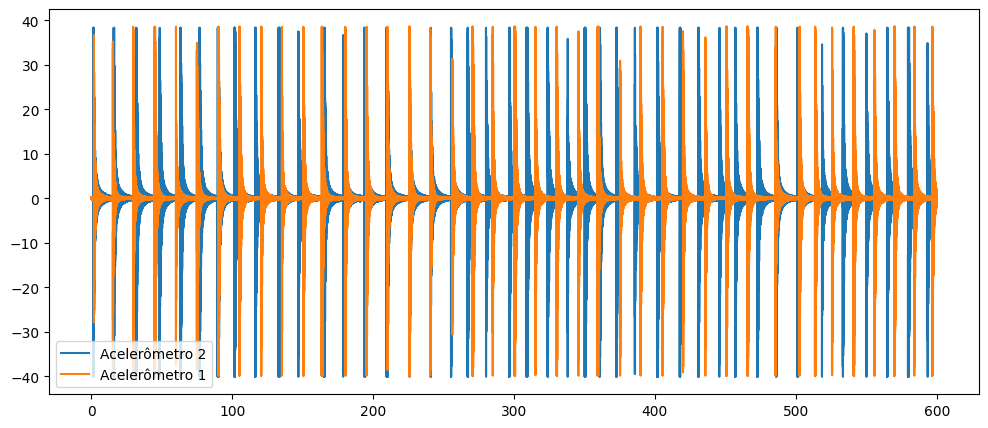

In [7]:
plt.plot(time1,acc2d,label="Acelerômetro 2")
plt.plot(time1,acc1d,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

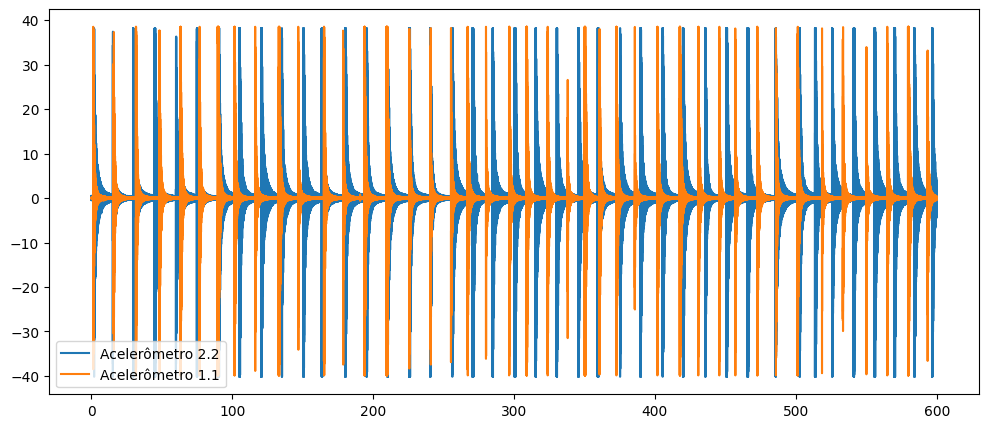

In [8]:
plt.plot(time11,acc2d1,label="Acelerômetro 2.2")
plt.plot(time11,acc1d1,label="Acelerômetro 1.1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   401,   3193,   6183,   9376,  12504,  15605,  18771,  21907,
        25064,  28151,  31312,  34018,  37490,  40658,  43731,  46918,
        50044,  53292,  56334,  59257,  62547,  65572,  68701,  71914,
        74785,  78063,  81057,  84335,  87342,  90648,  93725,  96831,
       101039, 104545, 106815, 109344, 112575, 115608, 118593, 121494,
       124140], dtype=int64), {'peak_heights': array([36.6858563 , 35.2445469 , 38.54136259, 38.54136259, 38.54136259,
       34.93449779, 38.54136259, 38.54136259, 38.54136259, 38.54136259,
       38.54136259, 38.54136259, 38.54136259, 38.54136259, 38.54136259,
       38.54136259, 38.09005558, 31.3491808 , 38.54136259, 38.54136259,
       38.54136259, 38.54136259, 38.54136259, 37.51784138, 38.54136259,
       30.92899841, 38.54136259, 38.54136259, 37.56572541, 36.16511744,
       38.54136259, 38.54136259, 38.54136259, 38.52460318, 38.54136259,
       38.38693658, 38.54136259, 37.8326789 , 38.54136259, 38.54136259,
       38.54136259])}

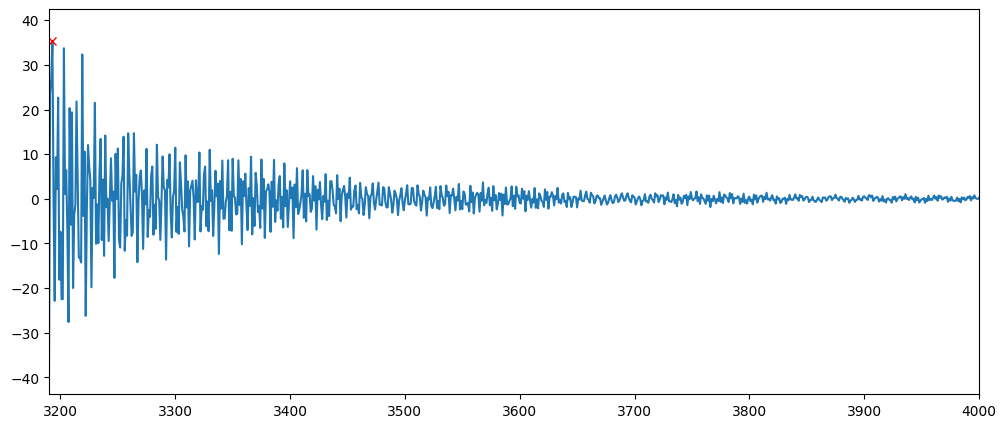

In [15]:
aux1 = signal.find_peaks(acc1d,height=2,distance=1300)#para achar picos
print(aux1)
plt.plot(acc1d)
plt.plot(aux1[0],aux1[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(3190,4000)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   288,   3348,   6614,  10072,  13166,  15998,  18687,  21179,
        24198,  27751,  30557,  34362,  37171,  40318,  43694,  46953,
        50106,  53099,  55556,  58266,  61668,  64249,  67373,  70327,
        72882,  75033,  77498,  80234,  83578,  86869,  89615,  92712,
        95060,  98293, 101063, 104286, 107866, 110972, 114422, 117497,
       120662, 123455], dtype=int64), {'peak_heights': array([38.52972533, 37.33980711, 38.52972533, 37.72287937, 38.52972533,
       38.52972533, 38.52972533, 38.52972533, 38.52972533, 38.52972533,
       38.52972533, 38.52972533, 37.66541853, 38.52972533, 38.52972533,
       38.08560093, 38.23523853, 38.25798344, 38.52972533, 38.52972533,
       38.52972533, 38.52972533, 38.52972533, 26.57906775, 38.52972533,
       38.02335168, 38.52972533, 38.49261521, 38.52972533, 38.52972533,
       38.52972533, 38.52972533, 38.15024437, 38.52972533, 38.23643563,
       38.52972533, 38.17298929, 38.45430798, 33.96398277, 38.52972533,
       38.529

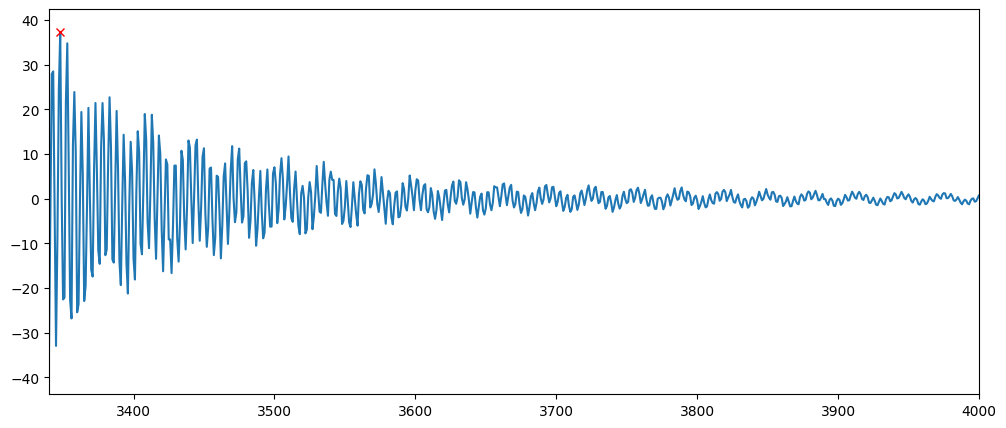

In [10]:
aux11 = signal.find_peaks(acc1d1,height=2,distance=1300)#para achar picos
print(aux11)
plt.plot(acc1d1)
plt.plot(aux11[0],aux11[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(3340,4000)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

# Para Chave Media


In [31]:
acc1dm = dadosChaveMedia.imu1accz.values - dadosChaveMedia.imu1accz.mean()  # Acelerômetro 1
acc2dm = dadosChaveMedia.imu2accz.values - dadosChaveMedia.imu2accz.mean()  # Acelerômetro 2
time1m = dadosChaveMedia.time.values
display(dadosChaveMedia.getLogs())

TSamplm2 = dadosChaveMedia.time.values[1]-dadosChaveMedia.time.values[0]
display(1/TSamplm2)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

In [32]:
acc1dm1 = dadosImpactoChaveMedia.imu1accz.values - dadosImpactoChaveMedia.imu1accz.mean()  # Acelerômetro 1
acc2dm1 = dadosImpactoChaveMedia.imu2accz.values - dadosImpactoChaveMedia.imu2accz.mean()  # Acelerômetro 2
time1m1 = dadosImpactoChaveMedia.time.values
display(dadosImpactoChaveMedia.getLogs())

TSamplm22 = dadosImpactoChaveMedia.time.values[1]-dadosImpactoChaveMedia.time.values[0]
display(1/TSamplm22)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

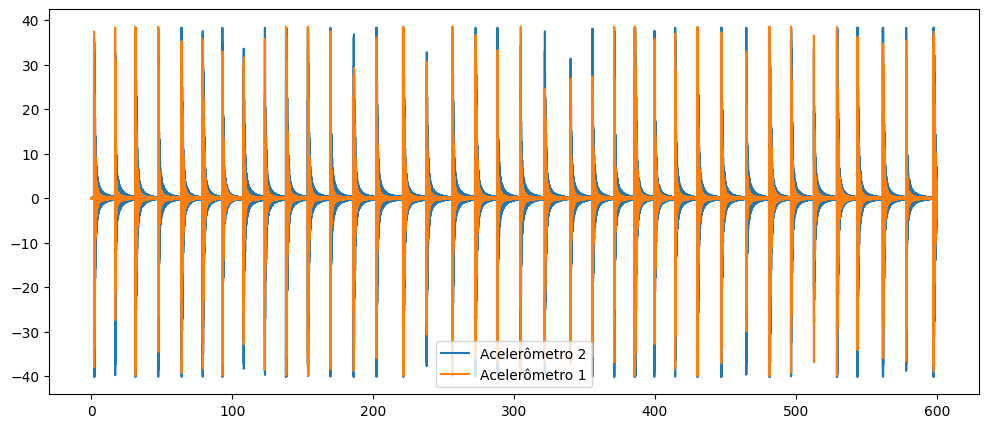

In [18]:
plt.plot(time1m,acc2dm,label="Acelerômetro 2")
plt.plot(time1m,acc1dm,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

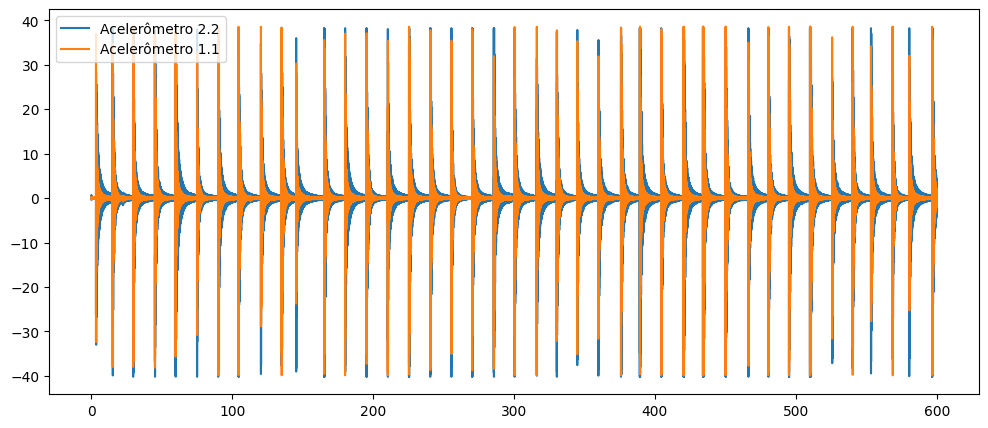

In [19]:
plt.plot(time1m1,acc2dm1,label="Acelerômetro 2.2")
plt.plot(time1m1,acc1dm1,label="Acelerômetro 1.1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   416,   3530,   6509,   9894,  13359,  16458,  19374,  22539,
        25627,  28748,  31978,  35314,  38789,  42085,  46028,  49514,
        53306,  56739,  59974,  63392,  66954,  70759,  73972,  77177,
        80232,  83144,  86190,  89488,  93011,  96689, 100092, 103287,
       106665, 110074, 113095, 116890, 120288, 124372], dtype=int64), {'peak_heights': array([37.46725801, 38.3183967 , 38.53028355, 38.53028355, 35.29930841,
       35.71589949, 33.02361973, 31.64336247, 35.78533134, 38.53028355,
       38.53028355, 37.56542028, 29.29943905, 36.13847609, 38.53028355,
       30.55400072, 38.53028355, 36.72385839, 33.29536162, 38.53028355,
       24.56969367, 26.9219968 , 27.38288062, 38.53028355, 38.53028355,
       35.79730235, 36.94532205, 38.53028355, 37.29607259, 32.92904876,
       38.53028355, 38.53028355, 36.57062949, 38.43571258, 36.27614268,
       34.79173765, 35.45852282, 37.41458557])})


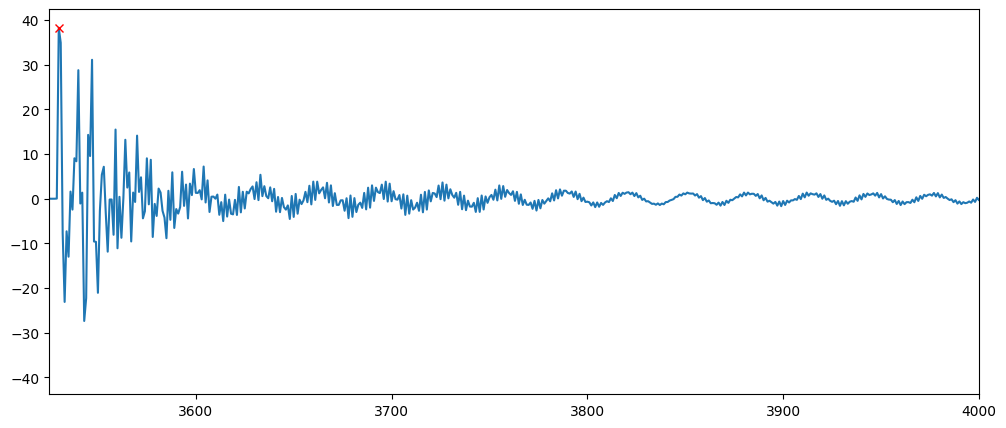

In [20]:
aux2 = signal.find_peaks(acc1dm,height=3,distance=1000)#para achar picos
print(aux2)
plt.plot(acc1dm)
plt.plot(aux2[0],aux2[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(3525,4000)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   701,   3183,   6184,   9395,  12440,  15629,  18746,  21744,
        25046,  28106,  30247,  34384,  37469,  40644,  43784,  46913,
        50059,  53167,  56222,  59449,  62497,  65766,  68730,  71743,
        74875,  78202,  80988,  84135,  87460,  90298,  93657,  96991,
        99933, 102990, 106130, 109355, 112389, 115092, 118301, 120748,
       124129], dtype=int64), {'peak_heights': array([36.84875359, 34.75741844, 38.54504547, 36.7242551 , 37.95367766,
       32.89951795, 38.47441652, 38.54504547, 38.54504547, 38.35470643,
       30.28385264, 35.571447  , 37.0067709 , 37.11570707, 35.39786738,
       38.53905996, 37.82917917, 35.4254007 , 38.03747471, 31.93345758,
       38.49117593, 38.54504547, 37.75136761, 35.31885873, 31.89993876,
       38.39181656, 38.54504547, 38.04226312, 38.54504547, 38.54504547,
       38.54504547, 34.97050239, 38.47681072, 38.54504547, 38.54504547,
       36.18915103, 38.54504547, 34.15168542, 38.54504547, 32.01845174,
       38.54504547])}

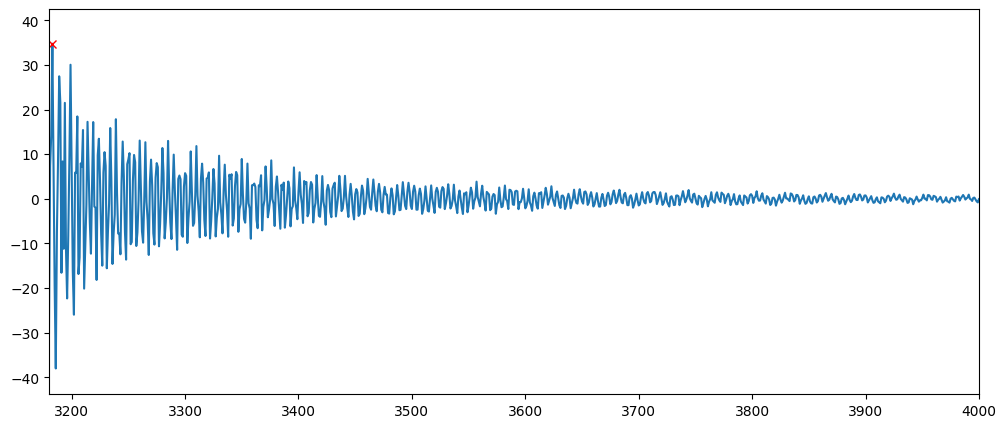

In [25]:
aux21 = signal.find_peaks(acc1dm1,height=3,distance=1000)#para achar picos
print(aux21)
plt.plot(acc1dm1)
plt.plot(aux21[0],aux21[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(3180,4000)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

# Para Chave Pequena

In [33]:
acc1dp = dadosChavePequena.imu1accz.values - dadosChavePequena.imu1accz.mean()  # Acelerômetro 1
acc2dp = dadosChavePequena.imu2accz.values - dadosChavePequena.imu2accz.mean()  # Acelerômetro 2
time1p = dadosChavePequena.time.values
display(dadosChavePequena.getLogs())

TSamplp3 = dadosChavePequena.time.values[1]-dadosChavePequena.time.values[0]
display(1/TSamplp3)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

In [34]:
acc1dp1 = dadosImpactoChavePequena.imu1accz.values - dadosImpactoChavePequena.imu1accz.mean()  # Acelerômetro 1
acc2dp1 = dadosImpactoChavePequena.imu2accz.values - dadosImpactoChavePequena.imu2accz.mean()  # Acelerômetro 2
time1p1 = dadosImpactoChavePequena.time.values
display(dadosImpactoChavePequena.getLogs())

TSamplp33 = dadosImpactoChavePequena.time.values[1]-dadosImpactoChavePequena.time.values[0]
display(1/TSamplp33)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

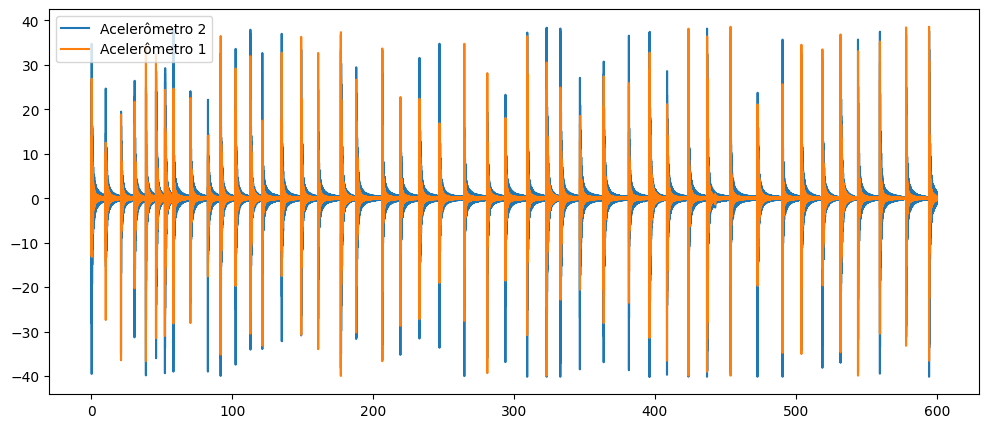

In [35]:
plt.plot(time1p,acc2dp,label="Acelerômetro 2")
plt.plot(time1p,acc1dp,label="Acelerômetro 1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

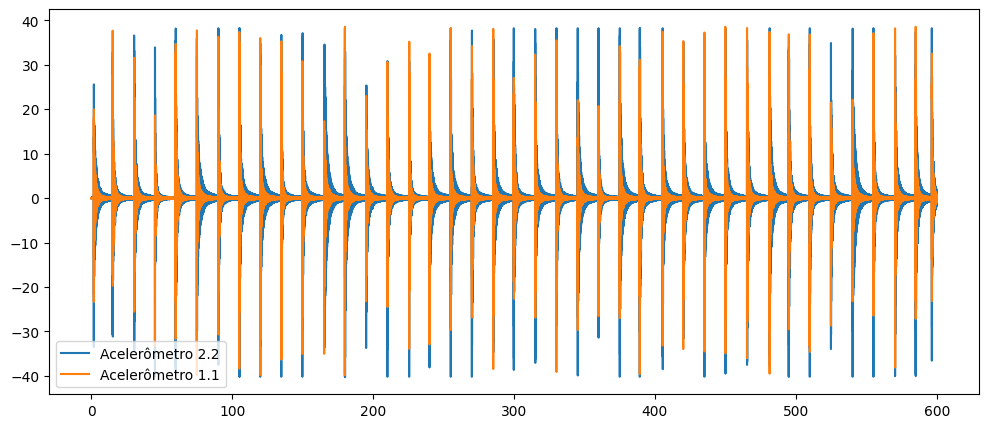

In [36]:
plt.plot(time1p1,acc2dp1,label="Acelerômetro 2.2")
plt.plot(time1p1,acc1dp1,label="Acelerômetro 1.1")

plt.legend()

#plt.xlim(2,10) -> para dar zoom e analisar intervalo da amostra

plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([    63,    599,   2143,   2647,   4396,   4897,   6407,   6918,
         8069,   8573,   9552,  10062,  10899,  11410,  12138,  14660,
        15170,  17226,  17753,  19106,  19657,  21309,  21845,  23487,
        24022,  25269,  28113,  28651,  30987,  31526,  33497,  34033,
        36854,  37354,  39103,  39611,  42965,  43465,  45646,  46168,
        48450,  48950,  51403,  51906,  55070,  58462,  58996,  61147,
        61666,  64348,  64851,  67222,  67729,  69250,  69806,  72141,
        72691,  75644,  76199,  79368,  82422,  82962,  85000,  85521,
        88152,  88656,  90904,  91460,  94365,  94873,  98345,  98869,
       102041, 104822, 105327, 107924, 108429, 110597, 111102, 113182,
       113682, 116407, 116910, 120275, 123665, 124168], dtype=int64), {'peak_heights': array([26.86808987,  1.11725391, 12.4873176 ,  1.33392916, 18.82716359,
        1.10648   , 21.70379689,  1.31477555, 34.49960766,  1.3949813 ,
       32.30292764,  1.66432899, 24.36854333,  1.64517538,

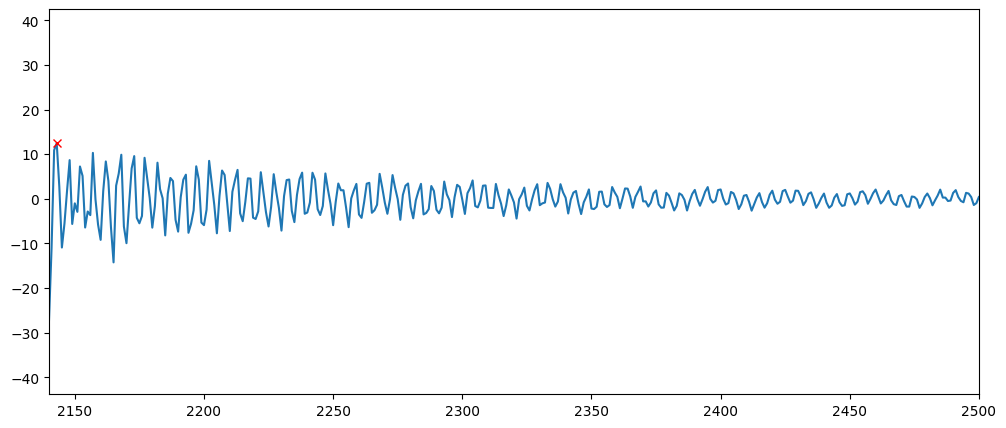

In [37]:
aux3 = signal.find_peaks(acc1dp,height=1,distance=500)#para achar picos
print(aux3)
plt.plot(acc1dp)
plt.plot(aux3[0],aux3[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(2140,2500)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

(array([   393,    912,   3161,   3696,   6316,   6821,   9412,  12468,
        12992,  15599,  16100,  18767,  19316,  21857,  22359,  24942,
        25448,  28060,  28618,  31168,  31691,  34383,  34893,  35448,
        37447,  37947,  40571,  41078,  43712,  44250,  46940,  47484,
        49931,  50458,  53062,  53567,  56195,  56745,  59339,  59872,
        62369,  62930,  65517,  66023,  68663,  69222,  71826,  72347,
        74882,  75401,  78012,  78518,  80963,  81498,  84331,  84843,
        87390,  87915,  90514,  91015,  93594,  94100,  96795,  97320,
       100124, 100627, 102957, 103556, 106052, 106612, 109180, 109681,
       112380, 112885, 115451, 116015, 118645, 119156, 121690, 122194,
       124077, 124636], dtype=int64), {'peak_heights': array([19.9658096 ,  1.88240446, 37.66494537,  1.88958706, 31.58726446,
        2.41750853, 18.63223927, 34.70690922,  1.91712038, 37.73318012,
        1.9434566 , 36.32538954,  1.33652648, 37.39200638,  1.68248862,
       36.02731144

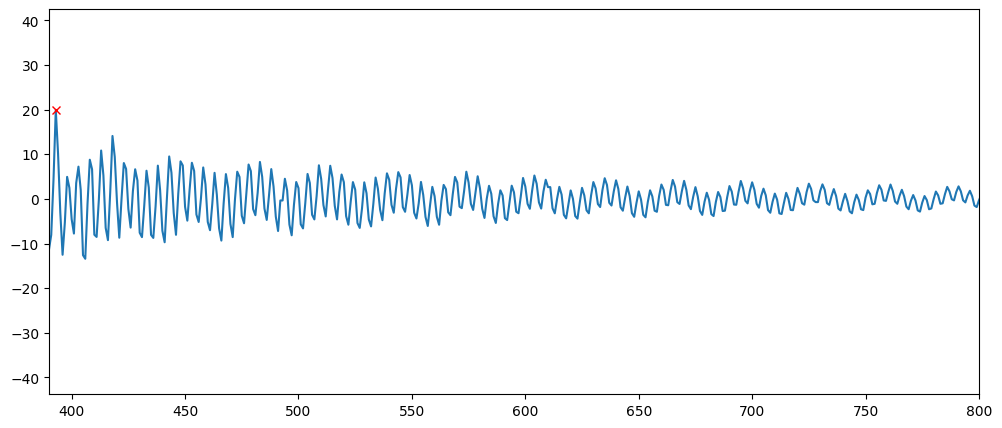

In [44]:
aux31 = signal.find_peaks(acc1dp1,height=1,distance=500)#para achar picos
print(aux31)
plt.plot(acc1dp1)
plt.plot(aux31[0],aux31[1]['peak_heights'], 'xr')
#plt.gcf().set_size_inches(15,2)
plt.xlim(390,800)
plt.gcf().set_size_inches(12,5) #para falar intervalo em polegadas que deseja estudar amostra
plt.show()

# Criando as Funções

In [45]:
TamJanela = int(3.6*208)

def criar_amostras_e_rotulos(dados, nome_arquivo):
    acc1 = dados.imu1accz.values - dados.imu1accz.mean()
    picos, _ = signal.find_peaks(acc1, height=3, distance=1500)  
    amostras = []
    rotulos = []

    for i in range(len(picos) - 1):
        inicio = picos[i]
        fim = picos[i] + TamJanela
        amostra = acc1[inicio:fim]
        amostra = amostra - amostra.mean() 
        amostra = amostra / amostra.max()
        amostras.append(amostra)
        rotulos.append(nome_arquivo) #coluna de classificação em DEDO ou METAL

    return amostras, rotulos

In [46]:
# Criar amostras e rótulos para Chave Grande
amostras_chave_grande, rotulos_chave_grande = criar_amostras_e_rotulos(dadosChaveGrande, "ChaveGrande.feather")

# Criar amostras e rótulos para Chave Média
amostras_chave_media, rotulos_chave_media = criar_amostras_e_rotulos(dadosChaveMedia, "ChaveMedia.feather")

# Criar amostras e rótulos para Chave Pequena
amostras_chave_pequena, rotulos_chave_pequena = criar_amostras_e_rotulos(dadosChavePequena, "ChavePequena.feather")

# Criar amostras e rótulos para Impacto Chave Pequena
amostras_impacto_chave_pequena, rotulos_impacto_chave_pequena = criar_amostras_e_rotulos(dadosImpactoChavePequena, "Impacto_Chave_Pequena-9.feather")

# Criar amostras e rótulos para Impacto Chave Média
amostras_impacto_chave_media, rotulos_impacto_chave_media = criar_amostras_e_rotulos(dadosImpactoChaveMedia, "Impacto_Chave_Media-13.feather")

# Criar amostras e rótulos para Impacto Chave Grande
amostras_impacto_chave_grande, rotulos_impacto_chave_grande = criar_amostras_e_rotulos(dadosImpactoChaveGrande, "Impacto_Chave_Grande-22.feather")

In [51]:
X_multiclass = np.vstack(amostras_chave_grande + amostras_chave_media + amostras_chave_pequena + amostras_impacto_chave_grande + amostras_impacto_chave_media + amostras_impacto_chave_pequena)

y_multiclass = np.array(rotulos_chave_grande + rotulos_chave_media + rotulos_chave_pequena + rotulos_impacto_chave_grande + rotulos_impacto_chave_media + rotulos_impacto_chave_pequena)


In [52]:
# Visualizar a forma dos dados
print(X_multiclass.shape, y_multiclass.shape)

(242, 748) (242,)


In [53]:
# Dividir os dados em conjuntos de treinamento e teste
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2)

# Criar e treinar um modelo de classificação multiclasse
model_multiclass = RandomForestClassifier(n_estimators=200)
model_multiclass.fit(X_train_multiclass, y_train_multiclass)

# Fazer previsões no conjunto de teste
y_pred_multiclass = model_multiclass.predict(X_test_multiclass)

# Avaliar o desempenho do modelo
accuracy_multiclass = accuracy_score(y_test_multiclass, y_pred_multiclass)
print(f'Acurácia do modelo multiclasse: {accuracy_multiclass:.2f}')

# Exibir um relatório de classificação multiclasse
print(classification_report(y_test_multiclass, y_pred_multiclass))

# Matriz de confusão para classificação multiclasse
confusion_matrix_multiclass = confusion_matrix(y_true=y_test_multiclass, y_pred=y_pred_multiclass)
print("Matriz de Confusão:")
print(confusion_matrix_multiclass)

Acurácia do modelo multiclasse: 0.45
                                 precision    recall  f1-score   support

            ChaveGrande.feather       0.43      0.38      0.40         8
             ChaveMedia.feather       0.33      0.25      0.29         8
           ChavePequena.feather       0.50      0.67      0.57        12
Impacto_Chave_Grande-22.feather       0.22      0.67      0.33         3
 Impacto_Chave_Media-13.feather       0.57      0.50      0.53         8
Impacto_Chave_Pequena-9.feather       0.75      0.30      0.43        10

                       accuracy                           0.45        49
                      macro avg       0.47      0.46      0.43        49
                   weighted avg       0.51      0.45      0.45        49

Matriz de Confusão:
[[3 4 0 1 0 0]
 [3 2 3 0 0 0]
 [0 0 8 2 1 1]
 [1 0 0 2 0 0]
 [0 0 0 4 4 0]
 [0 0 5 0 2 3]]
